# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

In [1]:
!pip install matplotlib

In [88]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!pip3 install -U wbdata

In [4]:
import wbdata as wb

In [5]:
wb.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [6]:
help(wb)

Help on package wbdata:

NAME
    wbdata - wbdata: A wrapper for the World Bank API

PACKAGE CONTENTS
    cache
    client
    dates
    fetcher

FUNCTIONS
    get_default_client() -> wbdata.client.Client
        Get the default client

VERSION
    1.0.0

FILE
    c:\users\joaquin\appdata\local\anaconda3\lib\site-packages\wbdata\__init__.py




In [7]:
wb.get_countries()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

In [8]:
wb.get_indicators(source=25)

id                    name
--------------------  ----------------------------------------------------------------------------------------------------------------
BM.KLT.DINV.WD.GD.ZS  Foreign direct investment, net outflows (% of GDP)
BM.TRF.PWKR.CD.DT     Personal remittances, paid (current US$)
BX.KLT.DINV.WD.GD.ZS  Foreign direct investment, net inflows (% of GDP)
BX.TRF.PWKR.CD        Personal transfers, receipts (BoP, current US$)
CM.MKT.LCAP.GD.ZS     Market capitalization of listed domestic companies (% of GDP)
EG.ELC.ACCS.ZS        Access to electricity (% of population)
EG.USE.ELEC.KH.PC     Electric power consumption (kWh per capita)
EN.POP.DNST           Population density (people per sq. km of land area)
FB.ATM.TOTL.P5        Automated teller machines (ATMs) (per 100,000 adults)
FB.CBK.BRWR.P3        Borrowers from commercial banks (per 1,000 adults)
FP.CPI.TOTL           Consumer price index (2010 = 100)
FP.CPI.TOTL.ZG        Inflation, consumer prices (annual %)
FS.AST.DO

In [9]:
wb.get_indicators(source=2)

id                          name
--------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------
AG.CON.FERT.PT.ZS           Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS              Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2              Agricultural land (sq. km)
AG.LND.AGRI.ZS              Agricultural land (% of land area)
AG.LND.ARBL.HA              Arable land (hectares)
AG.LND.ARBL.HA.PC           Arable land (hectares per person)
AG.LND.ARBL.ZS              Arable land (% of land area)
AG.LND.CREL.HA              Land under cereal production (hectares)
AG.LND.CROP.ZS              Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2           Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS           Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.UR.K2  

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [38]:
# Resolver acá
indicadores2 = {"SP.DYN.LE00.MA.IN":"Esperanza de vida"}

Esperanza_de_vida = wb.get_dataframe(indicadores2, country = ["GBR","JPN"])

esp_vida = pd.DataFrame(Esperanza_de_vida)

esp_vida.reset_index(inplace=True)

print(esp_vida["date"].dtype)

esp_vida_2010 = esp_vida[esp_vida["date"]>"2009"]

esp_vida_2010 = esp_vida_2010.set_index(["country", "date"])

esp_vida_2010

#Elegimos los indicadores de gdp per capita y esperanza de vida
#Reducimos la informacion dada solo hasta el 2010 para que se entienda mejor la serie debido a que en la original hay una cantidad mucho mayor de datos y no
#se aprecia bien la serie


object


Esperanza de vida
country        date                   
United Kingdom 2023                NaN
               2022              80.40
               2021              78.70
               2020              78.40
               2019              79.60
               2018              79.50
               2017              79.50
               2016              79.40
               2015              79.20
               2014              79.50
               2013              79.20
               2012              79.10
               2011              79.00
               2010              78.50
Japan          2023                NaN
               2022              81.05
               2021              81.47
               2020              81.56
               2019              81.41
               2018              81.25
               2017              81.09
               2016              80.98
               2015              80.75
               2014              80.50
               2013              80.21
               2012              79.94
               2011              79.44
               2010              79.55

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [21]:
# Resolver acá
descripcion = esp_vida_2010.groupby(by=["country"]).describe()

descripcion


Esperanza de vida                                            \
                           count       mean       std    min    25%    50%   
country                                                                      
Japan                       13.0  80.707692  0.722359  79.44  80.21  80.98   
United Kingdom              13.0  79.230769  0.526600  78.40  79.00  79.20   

                              
                  75%    max  
country                       
Japan           81.25  81.56  
United Kingdom  79.50  80.40

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [39]:
esp_vida_2010 = esp_vida_2010.reset_index()
# Resetée el indice asi me aparece "country" como columna, por que sino me tiraba error, en el punto 1 lo indexamos asi quedaba mas estetico

In [40]:
print(esp_vida_2010.columns)

Index(['country', 'date', 'Esperanza de vida'], dtype='object')


In [41]:
# Resolver acá estilo pyplot
y1= esp_vida_2010[esp_vida_2010["country"]=="United Kingdom"]["Esperanza de vida"]
x1= esp_vida_2010[esp_vida_2010["country"]=="United Kingdom"]["date"]

y2= esp_vida_2010[esp_vida_2010["country"]=="Japan"]["Esperanza de vida"]
x2= esp_vida_2010[esp_vida_2010["country"]=="Japan"]["date"]

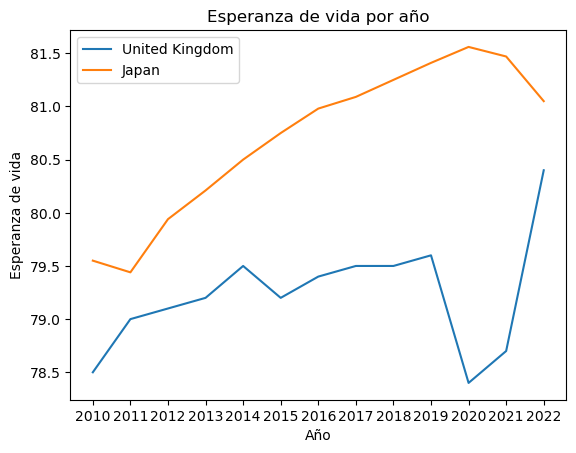

In [44]:
plt.plot(x1, y1, label="United Kingdom")
plt.plot(x2, y2, label="Japan")
plt.gca().invert_xaxis()
#Aca use este ultimo codigo para invertir el orden de los años en el eje X, ya que aparecian del mayor al menor (en esto me ayudó Chat gpt ya que no
#encontré nada de esto en las ultimas clases vistas)

plt.xlabel("Año")
plt.ylabel("Esperanza de vida")
plt.title("Esperanza de vida por año")

plt.legend()
plt.show()

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_8120\3102215915.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


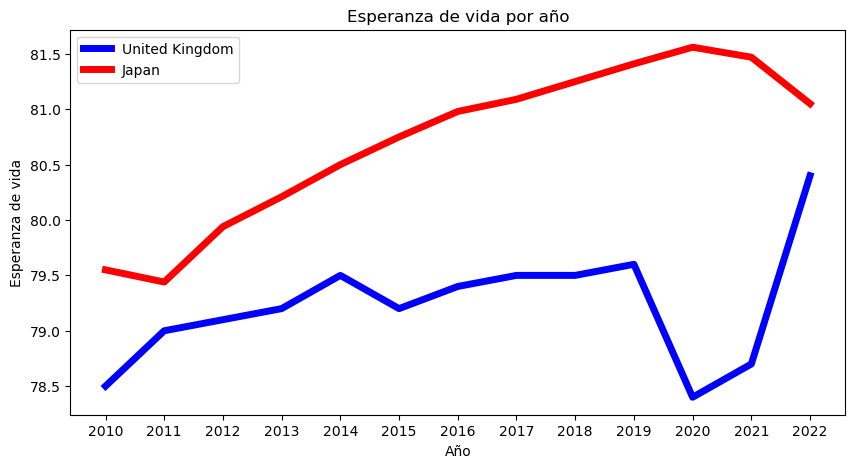

In [74]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 
fig, ax = plt.subplots(figsize=(10,5))

linea_gbr, = ax.plot(x1, y1,"b", label="United Kingdom")
linea_jpn, = ax.plot(x2, y2,"r" ,label="Japan")
ax.invert_xaxis()
linea_gbr.set_linewidth(5)
linea_jpn.set_linewidth(5)

ax.set_xlabel("Año")
ax.set_ylabel("Esperanza de vida")
ax.set_title("Esperanza de vida por año")

ax.legend(loc="upper left")
fig.show()

In [47]:
help (plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.

    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::

        import numpy as np
        import matplotlib.pyplot as plt

        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)

    The explicit object-oriented API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the Axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API </api/axes_api>` for the plotting methods on an Axes::

        import numpy as np
        import matplotlib.pyplot as plt

        x = np.arange(0, 5, 0.1)
      

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [1]:
import requests
from bs4 import BeautifulSoup

In [85]:
# Resolver acá
url = "https://www.lanacion.com.ar/"

req= requests.get(url)

contenido_pag = req.content

soup = BeautifulSoup(contenido_pag, "html.parser")

noticias = soup.find_all("a",class_="link ln-link flex flex-column --unstyled", href=True)

enlaces_noticias = []
for links in noticias:
    links_solos = links['href']
    enlaces_noticias.append(links_solos)

portada = enlaces_noticias[:10]

url_1 = "https://www.lanacion.com.ar"
enlaces_completos = [url_1 + enlace if enlace.startswith("/") else "" for enlace in portada]


for enlace in enlaces_completos:
    print(enlace)


https://www.lanacion.com.ar/politica/el-discurso-de-javier-milei-en-el-acto-por-malvinas-nid02042025/
https://www.lanacion.com.ar/politica/habla-javier-milei-en-vivo-la-cadena-nacional-del-2-de-abril-y-las-ultimas-noticias-nid02042025/
https://www.lanacion.com.ar/estados-unidos/dia-de-la-liberacion-los-grandes-interrogantes-antes-del-inminente-anuncio-de-aranceles-trump-que-nid02042025/
https://www.lanacion.com.ar/el-mundo/acabo-de-ver-el-mundo-del-futuro-y-no-esta-precisamente-en-los-estados-unidos-de-trump-nid02042025/
https://www.lanacion.com.ar/politica/villarruel-participa-del-acto-oficial-por-malvinas-en-ushuaia-nid02042025/
https://www.lanacion.com.ar/politica/con-cristina-o-con-axel-como-se-alinean-los-intendentes-bonaerenses-en-la-interna-que-jaquea-al-nid02042025/
https://www.lanacion.com.ar/espectaculos/murio-val-kilmer-a-los-65-anos-actor-conocido-por-protagonizar-a-jin-morrison-y-batman-nid02042025/
https://www.lanacion.com.ar/politica/una-reunion-crucial-para-milei-nid010

In [91]:
df_links = pd.DataFrame(enlaces_completos, columns=["Links"])
df_links.to_excel("tp1_punto4.xlsx", index=False)